# Algorithms on graphs. Introduction to graphs and basic algorithms on graphs

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.colors as mcolors

## Part 1

Generate a random adjacency matrix for a simple undirected unweighted graph with 100 vertices and 200 edges

In [2]:
# количество вершин
n = 100
# количество ребёр
m = 200
matrix = np.zeros((n, n))
count = 0
while count != m:
    i = random.randint(0, n - 1)
    j = random.randint(0, n - 1)
    if matrix[i][j] == 0 and i != j:
        matrix[i][j] = 1
        matrix[j][i] = 1
        count += 1

g = nx.Graph(matrix)

Visualize the graph and print several rows of the adjacency matrix and the adjacency list

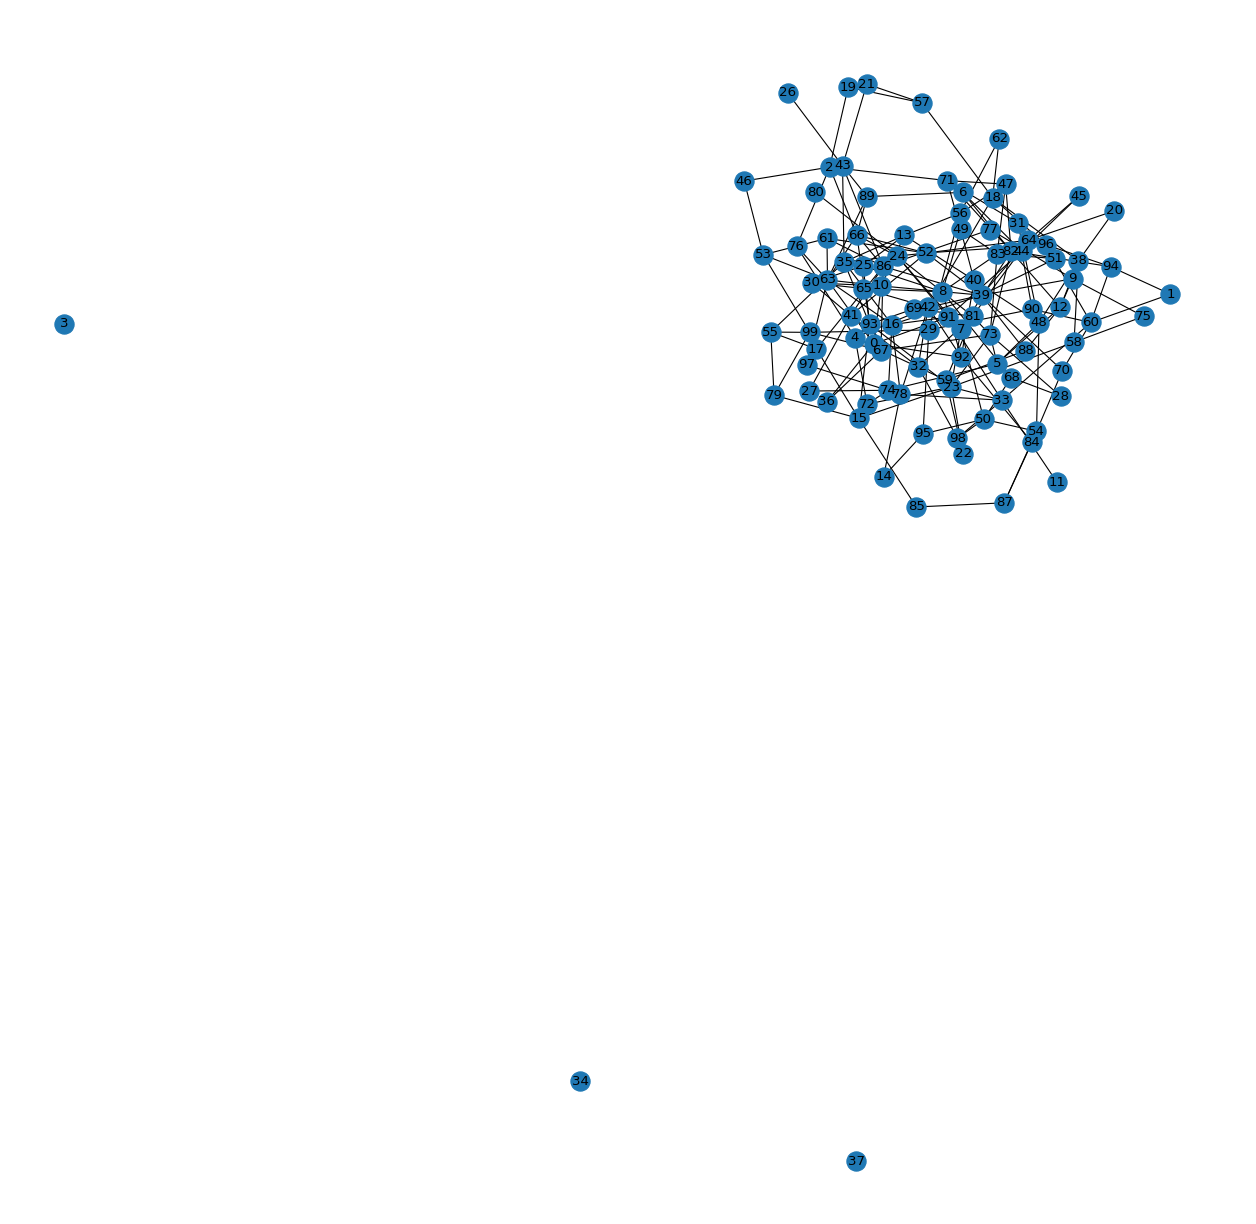

In [3]:
 def show_large_graph(graph):
    plt.figure(num=None, figsize=(20, 20), dpi=80)
    plt.axis('off')
    fig = plt.figure(1)
    
    pos = nx.spring_layout(graph)
    nx.draw_networkx_nodes(graph, pos)
    nx.draw_networkx_edges(graph, pos)
    nx.draw_networkx_labels(graph, pos)
    plt.show()

show_large_graph(g)
# nx.draw(g, with_labels=True)

In [4]:
def generate_adjlist_with_all_edges(G):
    for s, nbrs in G.adjacency():
        line = str(s) + ": "
        list_edges = []
        for t, data in nbrs.items():
                line += str(t) + " "
                list_edges.append(t)
        yield list_edges
        
adjlist = []
for line in generate_adjlist_with_all_edges(g):
    adjlist.append(line)
    
adjlist_dict = {}
for i in range(len(adjlist)):
    adjlist_dict[i] = adjlist[i]

adjacency list

In [5]:
for key in list(adjlist_dict.keys())[:10]:
    print(f"{key}: {adjlist_dict[key]}")
print("...")
for key in list(adjlist_dict.keys())[-10:]:
    print(f"{key}: {adjlist_dict[key]}")

0: [10, 36, 63, 91, 92]
1: [60, 94]
2: [19, 46, 66, 71, 76]
3: []
4: [42, 59, 72, 76, 93]
5: [12, 48, 73, 74]
6: [44, 82, 89]
7: [23, 24, 50, 69, 82]
8: [24, 25, 49, 65, 68, 81, 83, 92]
9: [12, 39, 75, 77]
...
90: [29, 44, 60]
91: [0, 16, 24, 33, 44]
92: [0, 8, 40, 42, 84]
93: [4, 15, 23, 25, 35, 66, 69]
94: [1, 60, 82, 96]
95: [14, 29, 50]
96: [18, 52, 60, 94]
97: [63, 78]
98: [32, 33, 50]
99: [29, 53, 55, 67, 79]


adjacency matrix

In [6]:
nx.to_numpy_matrix(g)

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
np.sum(nx.to_numpy_matrix(g)) 

400.0

## Part 2

### DFS, connected components

Use Depth-first search to find connected components of the graph

In [7]:
class Graph_search:

    # init function to declare class variables
    def __init__(self, adjlist):
        self.V = len(adjlist)
        self.adj = adjlist

    def DFSUtil(self, temp, v, visited):
        # Mark the current vertex as visited
        visited[v] = True
        # Store the vertex to list
        temp.append(v)
        # Repeat for all vertices adjacent
        # to this vertex v
        for i in self.adj[v]:
            if visited[i] == False:
                # Update the list
                temp = self.DFSUtil(temp, i, visited)
        return temp

    # Method to retrieve connected components
    # in an undirected graph
    def connectedComponents(self):
        visited = [False for i in range(self.V)]
        cc = []
        for v in range(self.V):
            if visited[v] == False:
                temp = []
                cc.append(self.DFSUtil(temp, v, visited))
        return cc



g2 = Graph_search(adjlist)
cc = g2.connectedComponents()
print(f"Number of connected components: {len(cc)}")
print(cc)

Number of connected components: 4
[[0, 10, 13, 25, 8, 24, 7, 23, 15, 17, 55, 35, 16, 39, 9, 12, 5, 48, 31, 71, 2, 19, 57, 18, 38, 20, 64, 45, 44, 6, 82, 47, 56, 29, 90, 60, 1, 94, 96, 52, 41, 27, 74, 72, 4, 42, 32, 81, 59, 22, 88, 69, 93, 66, 63, 53, 46, 61, 86, 43, 21, 26, 89, 67, 36, 73, 28, 68, 50, 54, 87, 84, 70, 92, 40, 49, 83, 51, 85, 95, 14, 78, 33, 11, 91, 98, 97, 99, 79, 77, 76, 65, 30, 62, 58, 75, 80], [3], [34], [37]]


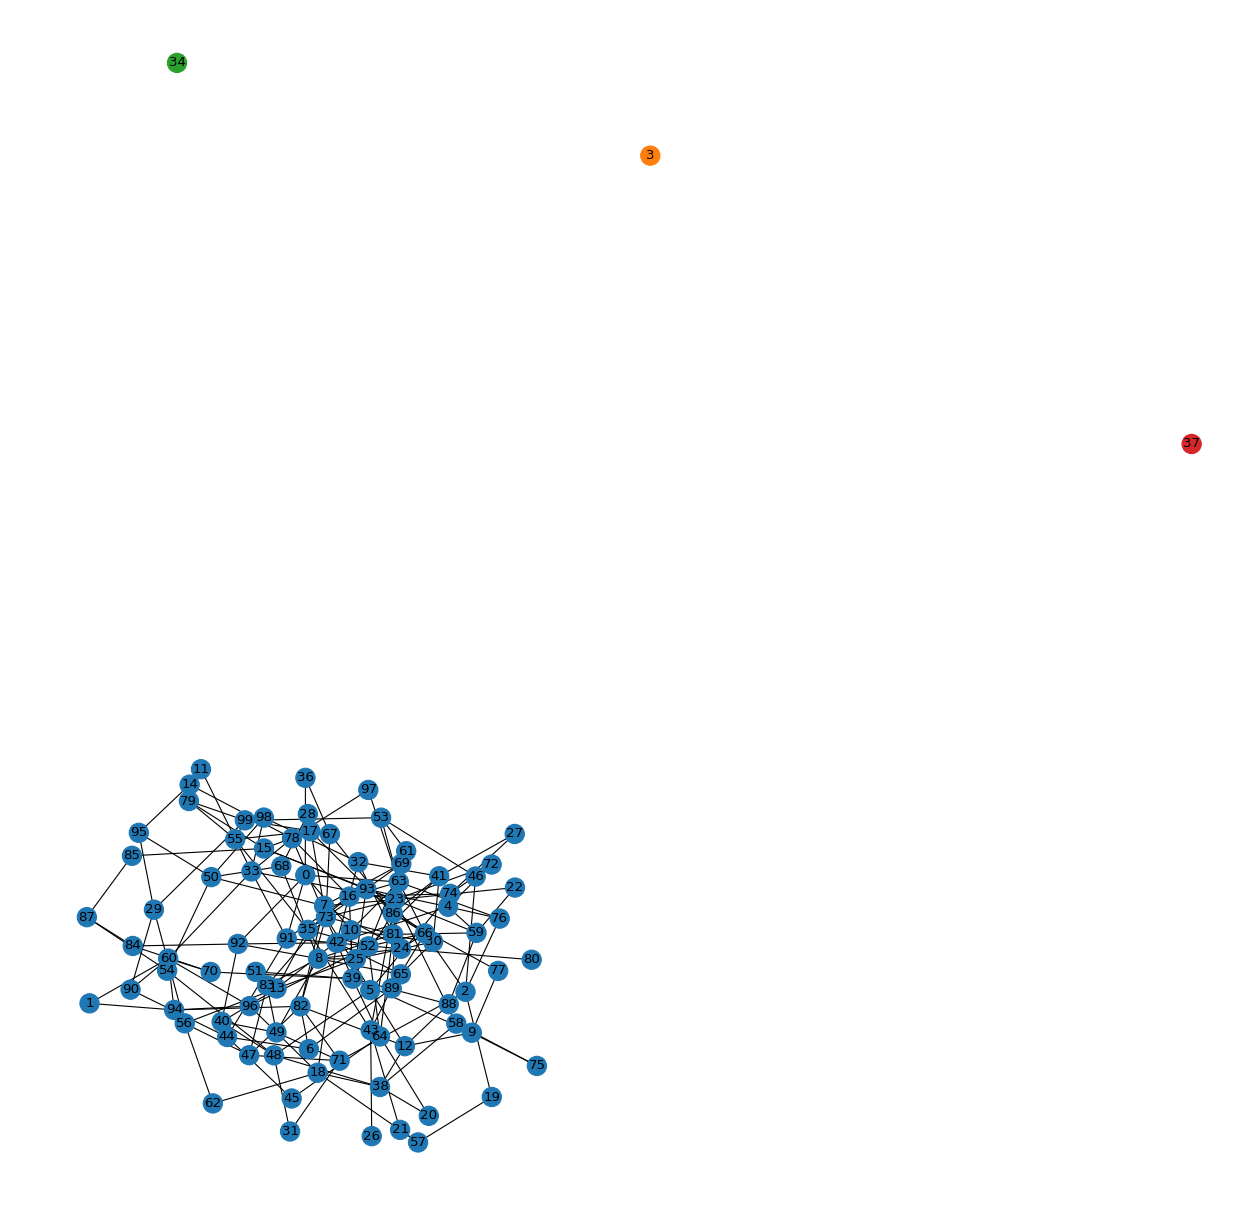

In [8]:
G = nx.erdos_renyi_graph(20, 0.1)
colors = list(mcolors.TABLEAU_COLORS)
color_map = []
num_com = len(cc)
for node in g:
    for i in range(num_com):
        if node in cc[i]:
            color_map.append(colors[i])
            
plt.figure(num=None, figsize=(20, 20), dpi=80)
plt.axis('off')
fig = plt.figure(1)

pos = nx.spring_layout(g)
nx.draw(g, node_color=color_map, with_labels=True)
plt.show()

### BFS, shortest path

Use Breadth-first search to find a shortest path between two random vertices

In [9]:
node_1 = random.randint(0, n - 1)
node_2 = random.randint(0, n - 1)
while node_2 == node_1:
    node_2 = random.randint(0, n)

print(node_1, node_2)

38 49


In [10]:
def bfs_shortest_path(graph, start, goal):
    explored = []
    queue = [[start]]
 
    if start == goal:
        return "Start = goal"
 
    while queue:
        path = queue.pop(0)
        node = path[-1]
        if node not in explored:
            neighbours = graph[node]

            for neighbour in neighbours:
                new_path = list(path)
                new_path.append(neighbour)
                queue.append(new_path)
                if neighbour == goal:
                    return new_path
            explored.append(node)
    return "Connecting path doesn't exist"
 

bfs_shortest_path = bfs_shortest_path(adjlist_dict, node_1, node_2) 
bfs_shortest_path

[38, 48, 40, 49]

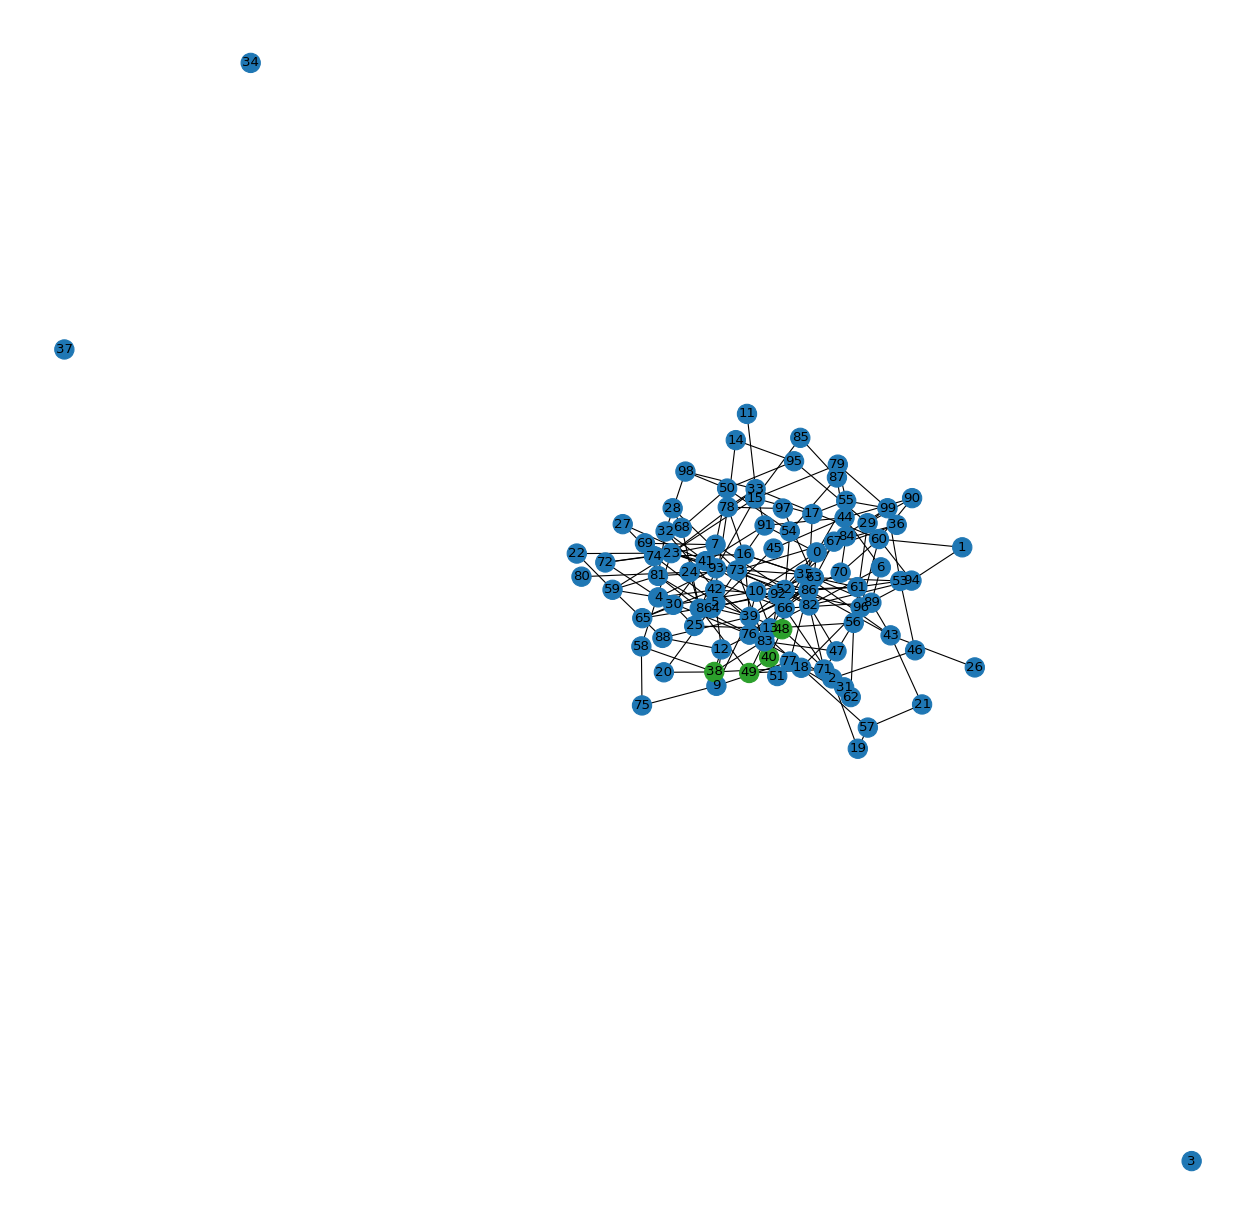

In [11]:
G = nx.erdos_renyi_graph(20, 0.1)
color_map = []
for node in g:
    if node in bfs_shortest_path:
        color_map.append('tab:green')
    else: 
        color_map.append('tab:blue')      
        
pos = nx.spring_layout(g)
plt.figure(num=None, figsize=(20, 20), dpi=80)
plt.axis('off')
fig = plt.figure(1)


nx.draw(g, node_color=color_map, with_labels=True)
plt.show()